In [2]:
# Cài đặt các thư viện cần thiết
!pip install pandas seaborn matplotlib wordcloud

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Thiết lập style và kích thước mặc định cho biểu đồ
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("Các thư viện đã sẵn sàng.")

Các thư viện đã sẵn sàng.


In [3]:
# Tải dữ liệu từ các file CSV được tạo bởi phần 3 SQL

daily_stats = pd.read_csv("daily_stock_stats_KO.csv")
price_changes = pd.read_csv("daily_price_changes_KO.csv")

# Chuyển đổi cột Ngày sang định dạng datetime để vẽ biểu đồ
daily_stats["Ngay"] = pd.to_datetime(daily_stats["Ngay"])
price_changes["Ngay"] = pd.to_datetime(price_changes["Ngay"])

print("Đã tải dữ liệu thành công từ các file CSV.")
print("\n5 dòng đầu của daily_stats:")
print(daily_stats.head())

Đã tải dữ liệu thành công từ các file CSV.

5 dòng đầu của daily_stats:
        Ngay  TrungBinhKhoiLuong  TrungBinhGiaDongCua
0 2025-05-02          12629600.0            71.650002
1 2025-05-05          11932700.0            71.699997
2 2025-05-06          12705500.0            71.720001
3 2025-05-07          15018200.0            72.400002
4 2025-05-08          14371100.0            71.169998


<ipython-input-4-8dd83ef0c167>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=daily_stats, x="Ngay", y="TrungBinhKhoiLuong", palette="mako")


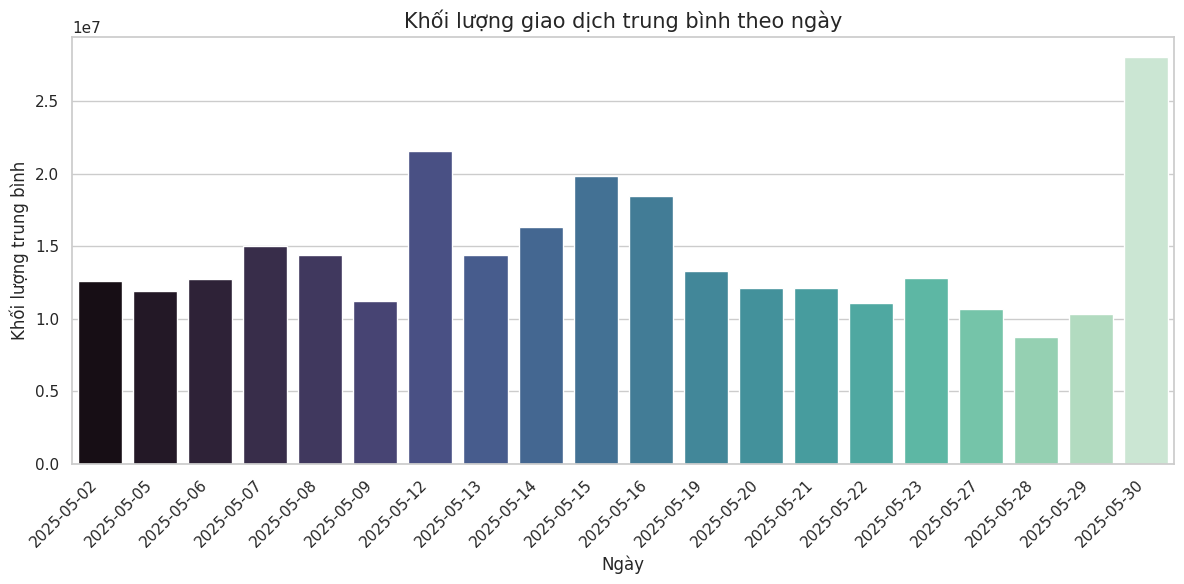

In [4]:
# 1. Biểu đồ cột: Khối lượng giao dịch trung bình theo ngày
plt.figure(figsize=(12, 6))
sns.barplot(data=daily_stats, x="Ngay", y="TrungBinhKhoiLuong", palette="mako")
plt.title("Khối lượng giao dịch trung bình theo ngày", fontsize=15)
plt.xlabel("Ngày")
plt.ylabel("Khối lượng trung bình")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

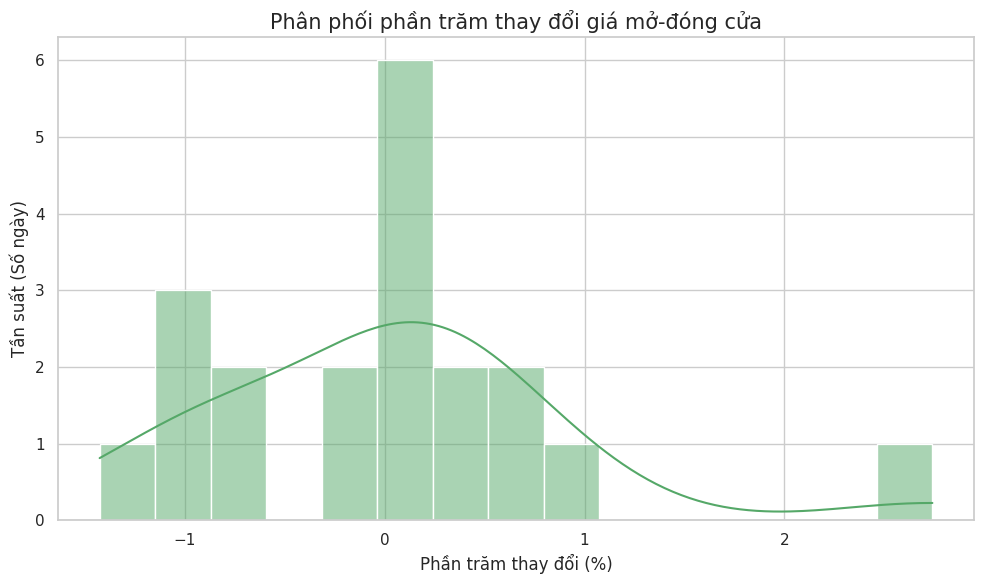

In [5]:
# 2. Biểu đồ histogram: Phân phối phần trăm thay đổi giá mở-đóng cửa
plt.figure(figsize=(10, 6))
sns.histplot(price_changes["PhanTramThayDoiGiaMoDongCua"], bins=15, kde=True, color='g')
plt.title("Phân phối phần trăm thay đổi giá mở-đóng cửa", fontsize=15)
plt.xlabel("Phần trăm thay đổi (%)")
plt.ylabel("Tần suất (Số ngày)")
plt.tight_layout()
plt.show()

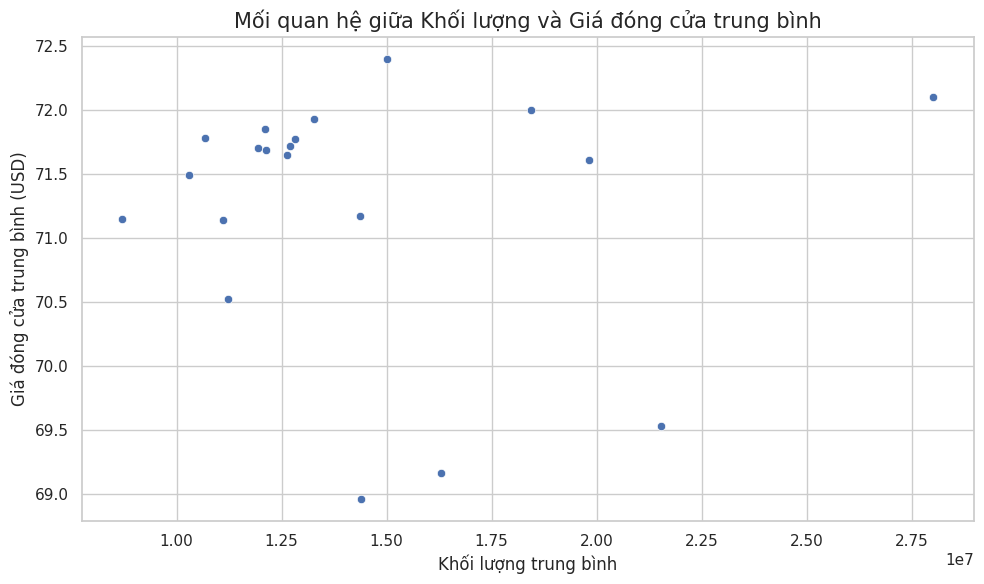

In [6]:
# 3. Biểu đồ scatter: Khối lượng vs Giá đóng cửa trung bình
plt.figure(figsize=(10, 6))
sns.scatterplot(data=daily_stats, x="TrungBinhKhoiLuong", y="TrungBinhGiaDongCua")
plt.title("Mối quan hệ giữa Khối lượng và Giá đóng cửa trung bình", fontsize=15)
plt.xlabel("Khối lượng trung bình")
plt.ylabel("Giá đóng cửa trung bình (USD)")
plt.tight_layout()
plt.show()

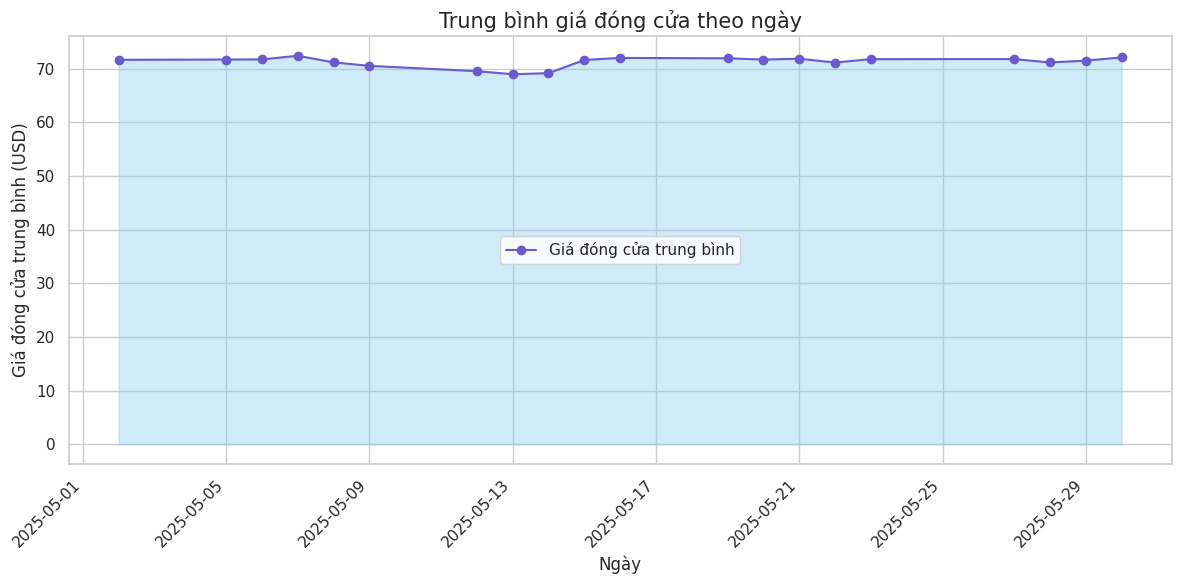

In [7]:
# 4. Biểu đồ area: Trung bình giá đóng cửa theo ngày
plt.figure(figsize=(12, 6))
plt.fill_between(daily_stats["Ngay"], daily_stats["TrungBinhGiaDongCua"], color='skyblue', alpha=0.4)
plt.plot(daily_stats["Ngay"], daily_stats["TrungBinhGiaDongCua"], color='Slateblue', marker='o', label="Giá đóng cửa trung bình")
plt.title("Trung bình giá đóng cửa theo ngày", fontsize=15)
plt.xlabel("Ngày")
plt.ylabel("Giá đóng cửa trung bình (USD)")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

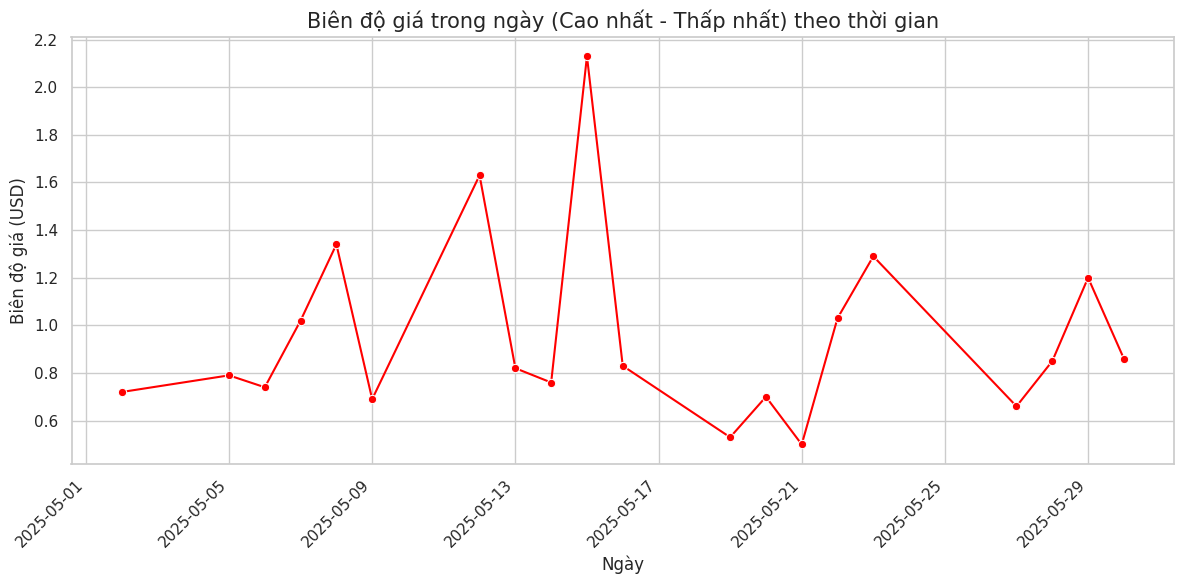

In [8]:
# 5. Biểu đồ đường: Biên độ giá trong ngày theo thời gian
plt.figure(figsize=(12, 6))
sns.lineplot(data=price_changes, x="Ngay", y="BienDoGiaTrongNgay", marker='o', color='red')
plt.title("Biên độ giá trong ngày (Cao nhất - Thấp nhất) theo thời gian", fontsize=15)
plt.xlabel("Ngày")
plt.ylabel("Biên độ giá (USD)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

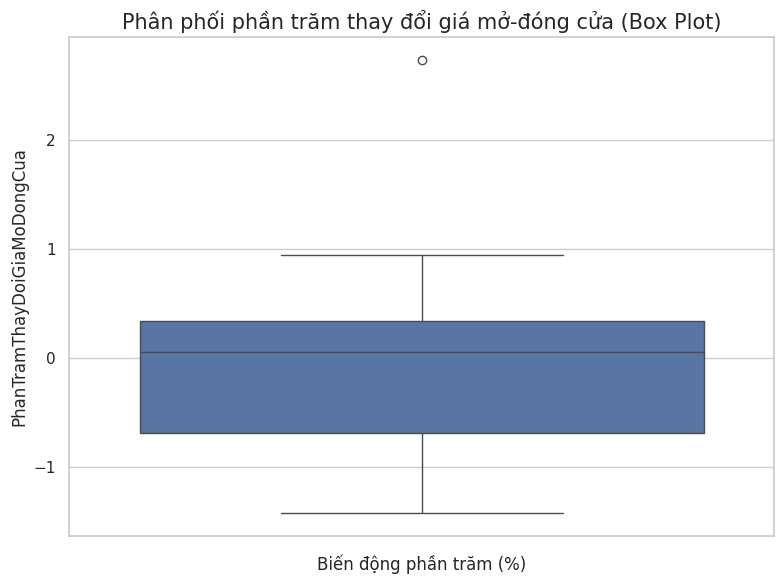

In [10]:
# 6. Biểu đồ boxplot: Phân phối phần trăm thay đổi giá
plt.figure(figsize=(8, 6))
sns.boxplot(data=price_changes["PhanTramThayDoiGiaMoDongCua"])
plt.title("Phân phối phần trăm thay đổi giá mở-đóng cửa (Box Plot)", fontsize=15)
plt.xlabel("Biến động phần trăm (%)")
plt.tight_layout()
plt.show()

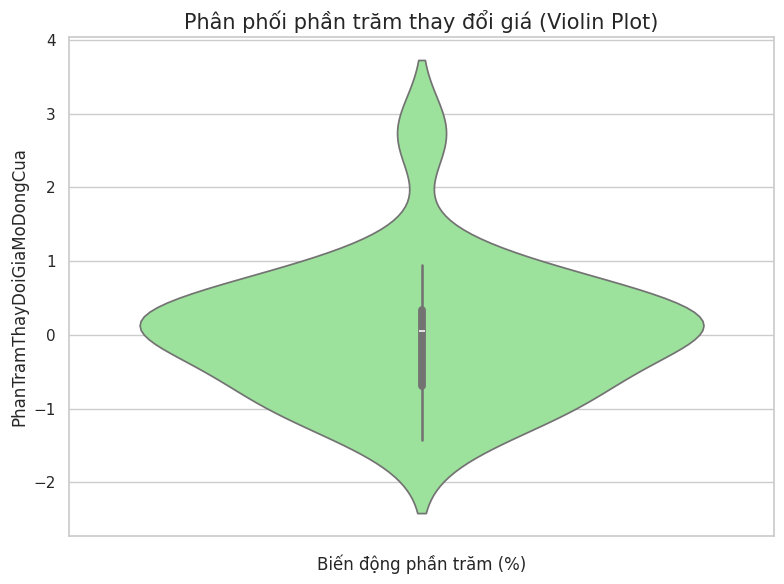

In [12]:
# 7. Biểu đồ violin: Phân phối phần trăm thay đổi giá
plt.figure(figsize=(8, 6))
sns.violinplot(data=price_changes["PhanTramThayDoiGiaMoDongCua"], color='lightgreen')
plt.title("Phân phối phần trăm thay đổi giá (Violin Plot)", fontsize=15)
plt.xlabel("Biến động phần trăm (%)")
plt.tight_layout()
plt.show()

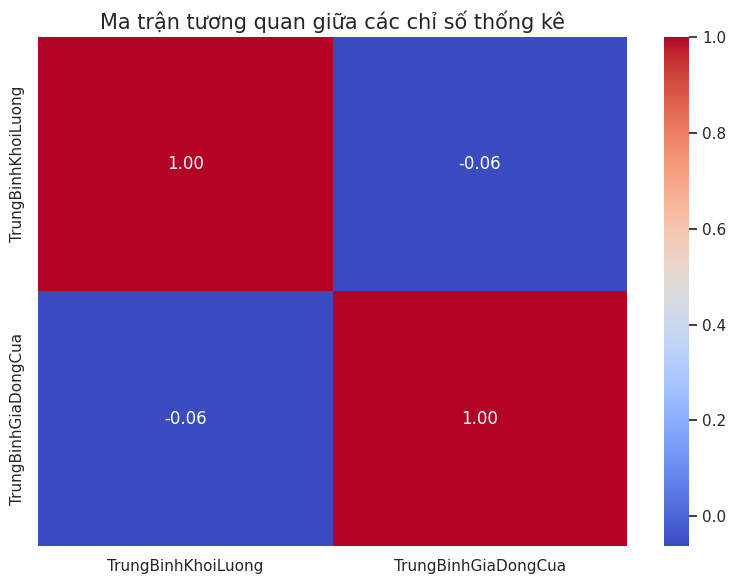

In [13]:
# 8. Biểu đồ heatmap: Tương quan các chỉ số thống kê
plt.figure(figsize=(8,6))
# Bỏ cột "Ngay" vì không phải là số để tính tương quan
corr = daily_stats.drop(columns=["Ngay"]).corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Ma trận tương quan giữa các chỉ số thống kê", fontsize=15)
plt.tight_layout()
plt.show()

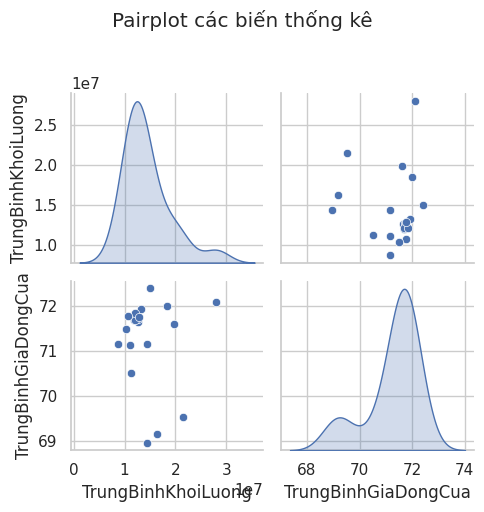

In [14]:
# 9. Biểu đồ pairplot: Mối quan hệ giữa các biến thống kê
# Bỏ cột "Ngay" và "SoLuongBanGhi" (vì chỉ có 1 giá trị)
sns.pairplot(daily_stats.drop(columns=["Ngay"]), diag_kind='kde')
plt.suptitle("Pairplot các biến thống kê", y=1.02)
plt.tight_layout()
plt.show()

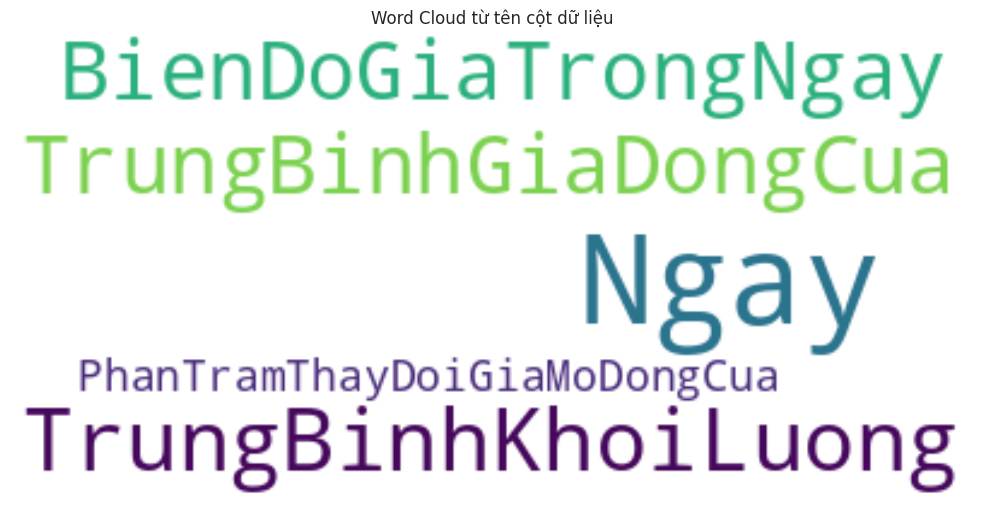

In [16]:
# 10. Word Cloud: Từ các cột dữ liệu
text = " ".join(daily_stats.columns.tolist() + price_changes.columns.tolist())
wordcloud = WordCloud(background_color='white').generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud từ tên cột dữ liệu")
plt.tight_layout()
plt.show()